<a href="https://colab.research.google.com/github/shridhar12d/Machine-Learning/blob/main/Roadmap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Roadmap Path Planning Approach**



The roadmap path planning approach is a classical method used to find paths for mobile robots by creating an abstract graph of possible paths through an environment. This method simplifies the navigation by reducing the continuous space into a discrete graph, which can be effectively used to find paths between any two points.

**Key Features of Roadmap Path Planning**
Simplicity: The environment is represented as a graph or a network of nodes and edges, where nodes represent specific points in the environment, and edges represent possible paths between these points.

**Visibility Graphs**: One common type of roadmap is the visibility graph, where nodes are placed at the start, goal, and all obstacle vertices, and edges are created between nodes if the direct path between them does not intersect any obstacles.

**Voronoi Diagram**: Another type is based on Voronoi diagrams which decompose the space into regions around points so that each point in a given region is closest to the same node in the environment. Edges in the Voronoi diagram connect nodes whose regions are adjacent.

**Probabilistic Roadmaps (PRM)**: This method randomly samples the free space, adds samples as nodes, and attempts to connect them with edges if they are not obstructed by obstacles, forming a network that can be used for multiple path queries.

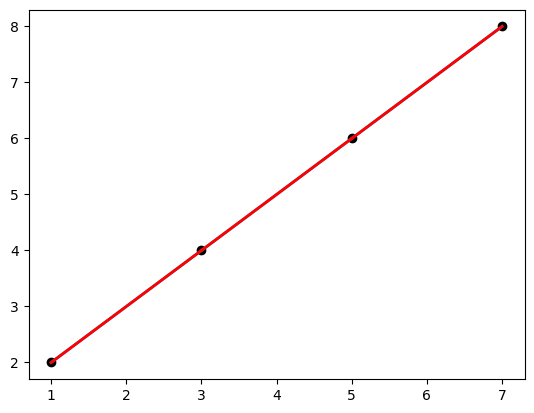

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(nodes, edges, path=None):
    fig, ax = plt.subplots()
    for (x, y) in nodes:
        ax.plot(x, y, 'o', color='black')
    for (start, end) in edges:
        line = plt.Line2D((nodes[start][0], nodes[end][0]), (nodes[start][1], nodes[end][1]), lw=2)
        ax.add_line(line)
    if path:
        for i in range(len(path)-1):
            line = plt.Line2D((nodes[path[i]][0], nodes[path[i+1]][0]), (nodes[path[i]][1], nodes[path[i+1]][1]), lw=2, color='red')
            ax.add_line(line)
    plt.show()


nodes = [(1, 2), (3, 4), (5, 6), (7, 8)]
edges = [(0, 1), (1, 2), (2, 3)]


path = [0, 1, 2, 3]


plot_graph(nodes, edges, path)


**Cell Decomposition**


Cell decomposition is another classic method for path planning in which the workspace is divided into manageable cells. Each cell is classified as either free or occupied. There are two main types of cell decomposition:

Exact Cell Decomposition: The workspace is divided into non-overlapping cells that completely cover the space without leaving any gaps. Each cell's boundaries correspond exactly to the boundaries of obstacles.

Approximate Cell Decomposition: The workspace is divided into a grid of uniform cells, and each cell is marked as free or occupied based on the presence of obstacles.

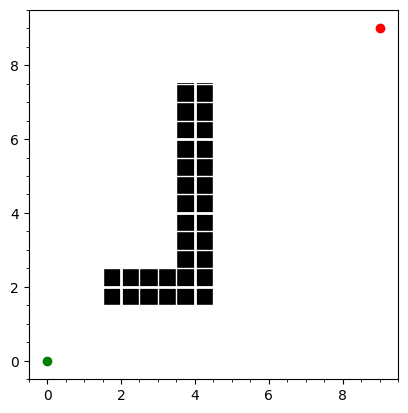

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(grid, start, goal, path=None):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='Greys', origin='lower')

    ax.plot(start[1], start[0], 'go')
    ax.plot(goal[1], goal[0], 'ro')

    if path:
        for (i, j) in path:
            ax.plot(j, i, 'bo')

    plt.grid(which='major', color='w', linestyle='-', linewidth=2)
    plt.minorticks_on()
    plt.grid(which='minor', color='w', linestyle='-', linewidth=1)
    plt.show()


grid_size = (10, 10)
grid = np.zeros(grid_size)

grid[3:8, 4] = 1
grid[2, 2:5] = 1

start = (0, 0)
goal = (9, 9)

plot_grid(grid, start, goal)


**Potential Fields**

Potential fields treat the goal as an attractive force pulling the robot towards it, while obstacles exert repulsive forces to push the robot away.

Key Concept
Attractive Force: Moves the robot towards the goal.
Repulsive Force: Moves the robot away from obstacles.
Potential Function: Combination of attractive and repulsive forces.

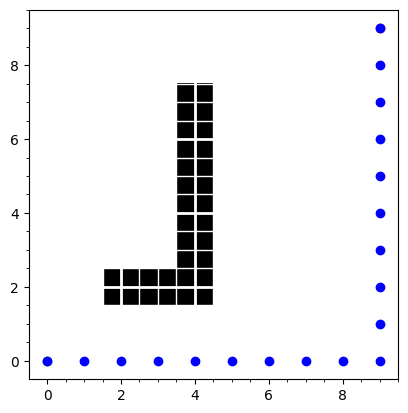

In [ ]:
import heapq

def dijkstra(grid, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while frontier:
        current_cost, current = heapq.heappop(frontier)

        if current == goal:
            break

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            next = (current[0] + dx, current[1] + dy)
            if 0 <= next[0] < grid.shape[0] and 0 <= next[1] < grid.shape[1] and not grid[next]:
                new_cost = current_cost + 1
                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost
                    priority = new_cost
                    heapq.heappush(frontier, (priority, next))
                    came_from[next] = current


    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

path = dijkstra(grid, start, goal)
plot_grid(grid, start, goal, path)
